# Laboratorio 4 - Inteligencia Artificial

## Autores:

- Nelson García
- Andy Fuentes
- Davis Roldan
- Ricardo Chuy
- Diederich Solís

## Task 1 - Preguntas teóricas

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

#### Task 2.1.1 - K-Means

### Ejercicio realizado 'a mano'

Se importan las librerías a utilizar.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.spatial.distance as metric

Se lee el dataset.

In [84]:
dataset = pd.read_csv('documents/bank_transactions.csv')

Visualizar los datos.

In [85]:
dataset.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [86]:
dataset.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


##### Elección de variables

Saldo de la Cuenta del Cliente (CustAccountBalance)

El saldo de la cuenta es un indicador clave del poder adquisitivo y el comportamiento financiero del cliente. Puede ayudar a distinguir entre clientes de alto, medio y bajo poder adquisitivo, lo que es crucial para segmentación en productos bancarios.

Dinero de la Transacción (TransactionAmount (INR))

Indica el comportamiento de gasto y la frecuencia de uso de la cuenta. Permite diferenciar clientes de alto valor (con altos saldos y transacciones grandes) de clientes más activos pero con saldos menores.

Convertir CustomerDOB a edad de cada cliente

Ahora que se tiene la edad se puede comenzar el proceso de clustering.

In [88]:
X = dataset.filter(['CustAccountBalance', 'TransactionAmount (INR)'])
X = np.array(X)
X = X[~np.isnan(X).any(axis=1)]  # Eliminar filas con NaN
X = X[~np.isinf(X).any(axis=1)]  # Eliminar filas con Inf

In [89]:
np.random.seed(42)  # Fijar semilla para resultados reproducibles
X = X[np.random.choice(X.shape[0], 25000, replace=False)]

print(f"Forma de X después de la limpieza: {X.shape}")

X

Forma de X después de la limpieza: (25000, 2)


array([[3.5003000e+04, 3.2500000e+02],
       [7.1649612e+05, 5.1900000e+02],
       [3.1788360e+04, 3.0000000e+01],
       ...,
       [1.9892000e+03, 9.2300000e+02],
       [3.9090750e+04, 1.7900000e+02],
       [6.1421320e+04, 2.0820000e+03]])

In [90]:
def euclidean_dist(A, B):
    return metric.euclidean(A, B)

def plot(data, k, index, centroids, orig_centroids):
    input = np.array(index, dtype=int)  # Asegurar que es un array de enteros
    
    colors = ["g", "r", "c", "b", "m", "y", "orange", "purple", "pink", "gray"]  # Hasta 10 clusters

    plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

    # Graficar los puntos según su cluster
    for i in range(k):
        cluster_points = data[input == i]  # Filtrar puntos del cluster i
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                    color=colors[i % len(colors)], s=50, alpha=0.6, label=f"Cluster {i+1}")

    # Graficar los centroides finales
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="o", color="black", s=75, 
                edgecolors="white", linewidth=2, label="Centroides Finales")

    # Graficar los centroides originales
    plt.scatter(orig_centroids[:, 0], orig_centroids[:, 1], marker="D", color="blue", s=75, 
                edgecolors="white", linewidth=2, label="Centroides Originales")

    # Configurar títulos y etiquetas
    plt.title("Segmentación de Clientes - K-Means", fontsize=14, fontweight="bold")
    plt.xlabel("Saldo de la Cuenta (INR)", fontsize=12)
    plt.ylabel("Monto de la Transacción (INR)", fontsize=12)
    
    # Agregar la leyenda
    plt.legend()
    
    # Mostrar la gráfica
    plt.show()



Función principal de k-means

In [91]:
class K_Means:
    def __init__(self, k, data, centeriod_init=None, max_iter=50, tol=1e-4):
        self.k = k
        self.data = np.array(data)  # Convertir a array de NumPy si aún no lo es
        self.centeriod_init = centeriod_init
        self.max_iter = max_iter
        self.tol = tol  # Umbral de convergencia

    def initialise_centroids(self):
        if self.centeriod_init == 'random':
            initial_centroids = np.random.permutation(self.data.shape[0])[:self.k]
            self.centroids = self.data[initial_centroids]
        elif self.centeriod_init == 'firstk':
            self.centroids = self.data[:self.k]
        else:
            self.centroids = np.array([self.data[i % self.k] for i in range(self.k)])
        return self.centroids

    def fit(self):
        m = self.data.shape[0]
        cluster_assignments = np.zeros((m, 2))

        self.centroids = self.initialise_centroids()
        orig_centroids = self.centroids.copy()  # Guardar los centroides originales
        prev_centroids = np.zeros_like(self.centroids)

        changed = True
        num_iter = 0

        while changed and num_iter < self.max_iter:
            changed = False
            for i in range(m):
                min_dist = np.inf
                min_index = -1
                for j in range(self.k):
                    dist_ji = metric.euclidean(self.centroids[j], self.data[i])
                    if dist_ji < min_dist:
                        min_dist = dist_ji
                        min_index = j

                if cluster_assignments[i, 0] != min_index:
                    changed = True
                cluster_assignments[i] = [min_index, min_dist**2]

            # Actualizar centroides
            for cent in range(self.k):
                points = self.data[np.where(cluster_assignments[:, 0] == cent)]
                if len(points) > 0:
                    self.centroids[cent] = np.mean(points, axis=0)

            # Verificar convergencia
            centroid_shift = np.linalg.norm(self.centroids - prev_centroids)
            if centroid_shift < self.tol:
                print(f"Convergencia alcanzada en {num_iter} iteraciones.")
                break

            prev_centroids = self.centroids.copy()
            num_iter += 1

        return self.centroids, cluster_assignments, num_iter, orig_centroids


Implementación de k-means:

Convergencia alcanzada en 17 iteraciones.


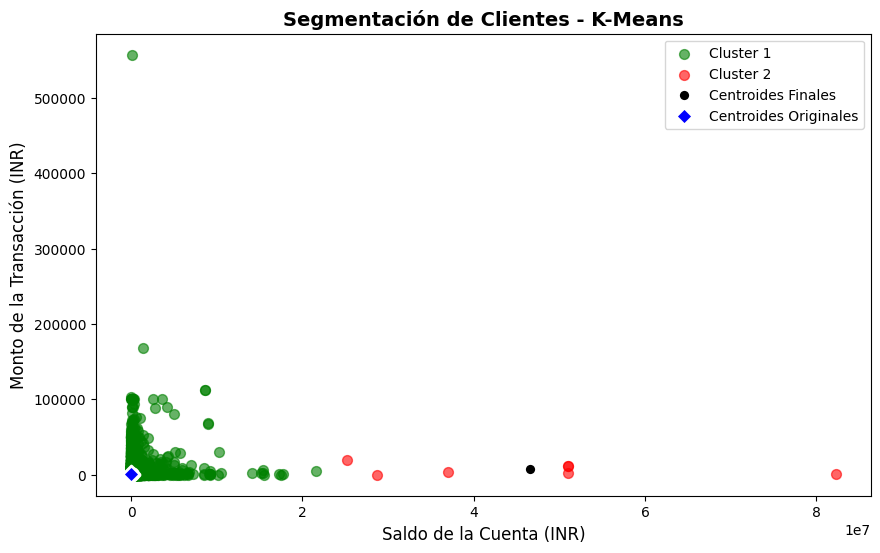

In [92]:
k_ = 2
kmeans = K_Means(k=k_, data=X, centeriod_init='random', max_iter=100, tol=1e-4)
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
plot(X,k_,index,centroids,orig_centroids)

Ahora se usará en método del codo para saber el número óptimo de clusteres (k) para los datos.

In [93]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i,data = X,centeriod_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
    distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
    cost = sum(distance)/(2*len(X))
    cost = np.array(cost)
    cost =  cost.item()
    costs.append(cost)

Convergencia alcanzada en 0 iteraciones.


Text(0, 0.5, 'Dispersion')

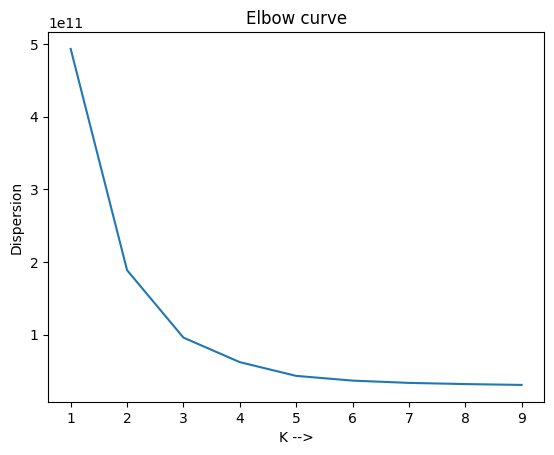

In [94]:
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

Como se puede ver, el 'mejor' valor para k estaría entre 3 y 4 clusteres, tal vez 5.

Para saber mejor qué k elegir vamos utilizar silhouette score para ver que k agrupar mejor los datos.

In [95]:
costs = []
for p in range(10):
    kmeans = K_Means(k=p,data = X,centeriod_init='random')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
    dist_ji = 0
    a = 0
    s=0
    for i in range(len(X)):
        for j in range(p):
            dist_ji += euclidean_dist(centroids[j,:],X[i,:])
            #print(dist_ji)
    dist_ji -= sum(cluster_assignments[:,1])/len(X)
    a = sum(cluster_assignments[:,1])/(len(X)-1)
    s = (dist_ji - a)/max(dist_ji,a)
    s = np.array(s)
    s =  s.item()
    costs.append(s)

Convergencia alcanzada en 0 iteraciones.


C:\Users\nel20\AppData\Local\Temp\ipykernel_10828\1534207145.py:14: RuntimeWarning: invalid value encountered in scalar divide
  s = (dist_ji - a)/max(dist_ji,a)


Convergencia alcanzada en 17 iteraciones.
Convergencia alcanzada en 27 iteraciones.
Convergencia alcanzada en 29 iteraciones.
Convergencia alcanzada en 44 iteraciones.
Convergencia alcanzada en 44 iteraciones.


Text(0, 0.5, 'Dispersion')

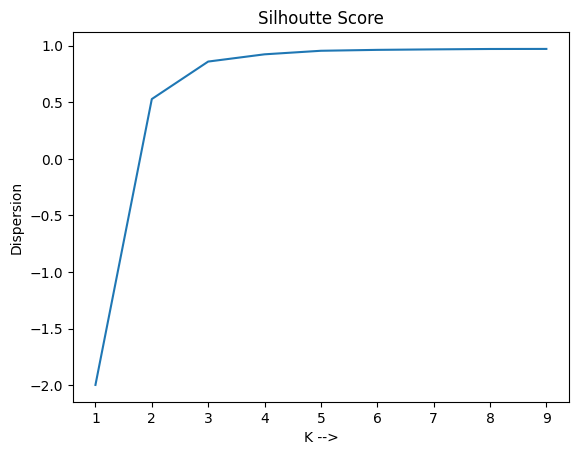

In [96]:
x = np.arange(10)
plt.plot(x,costs)
plt.title("Silhoutte Score")
plt.xlabel("K -->")
plt.ylabel("Dispersion")

Ahora con los resultados del Silhoutte se pude ver también entre 4 y 5. Se tomara a k=4 como la mejor opción para el agrupamiento de los datos. 

Convergencia alcanzada en 27 iteraciones.


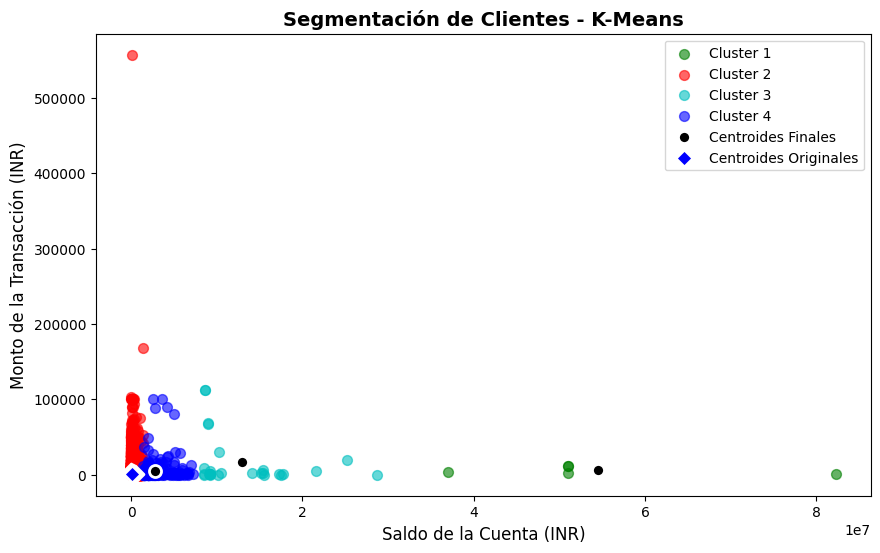

In [97]:
k_ = 4
kmeans = K_Means(k=k_, data=X, centeriod_init='random', max_iter=100, tol=1e-4)
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit()
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
plot(X,k_,index,centroids,orig_centroids)

### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco